In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv(r'D:\Sem - 5\ML- LAB\Assg-6 - SVM\spambase\spambase.data')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [7]:
X = data.iloc[ : , :-1]
Y = data.iloc[ : , -1]

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.20, random_state = 42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

results = []

In [9]:
def evm(m, xt, yt, t):
    p = m.predict(xt)
    a = accuracy_score(yt, p)
    
    print(f'Accuracy of {t} is {a: .4f}')
    print(f'Classification report of {t}')
    cfr = classification_report(yt, p)
    print(cfr)
    cfm = confusion_matrix(yt, p)
    sns.heatmap(cfm, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title(f'Confusion Matrix of {t}')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()
    return a

In [10]:
ls = SVC(kernel = 'linear')
ls.fit(X_train, Y_train)

SVC(kernel='linear')

Accuracy of Linear SVM is  0.9217
Classification report of Linear SVM
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       530
           1       0.93      0.88      0.91       390

    accuracy                           0.92       920
   macro avg       0.92      0.92      0.92       920
weighted avg       0.92      0.92      0.92       920



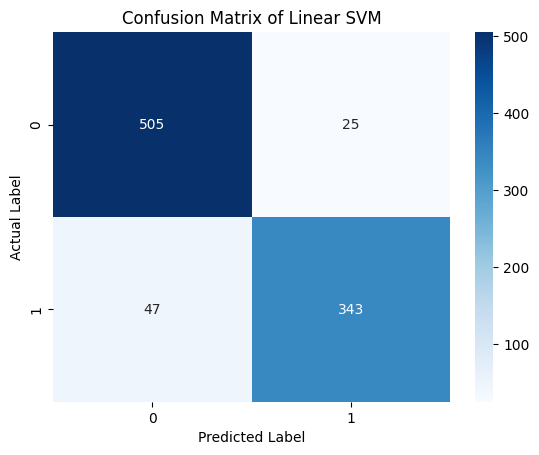

In [11]:
a1 = evm(ls, X_test, Y_test, "Linear SVM")
results.append(("Linear SVM", a1))

In [12]:
rs = SVC(kernel = 'rbf')
rs.fit(X_train, Y_train)

SVC()

Accuracy of Radial SVM is  0.9217
Classification report of Radial SVM
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       530
           1       0.95      0.86      0.90       390

    accuracy                           0.92       920
   macro avg       0.93      0.91      0.92       920
weighted avg       0.92      0.92      0.92       920



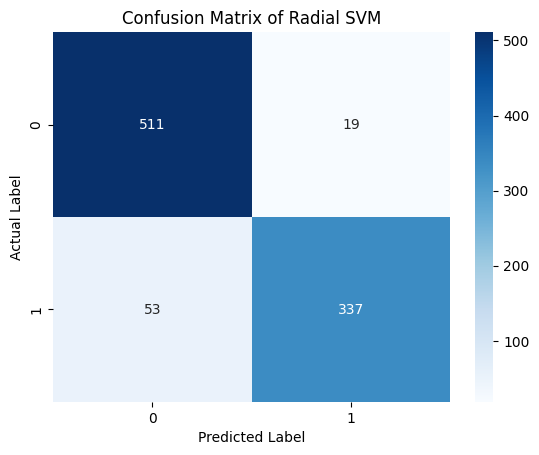

In [13]:
a2 = evm(rs, X_test, Y_test, "Radial SVM")
results.append(("Radial SVM", a2))

In [14]:
pd3 = SVC(kernel = 'poly', degree = 3)
pd3.fit(X_train, Y_train)

SVC(kernel='poly')

Accuracy of Polynomial SVM Of Degree 3 is  0.7652
Classification report of Polynomial SVM Of Degree 3
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       530
           1       0.96      0.47      0.63       390

    accuracy                           0.77       920
   macro avg       0.84      0.73      0.73       920
weighted avg       0.82      0.77      0.74       920



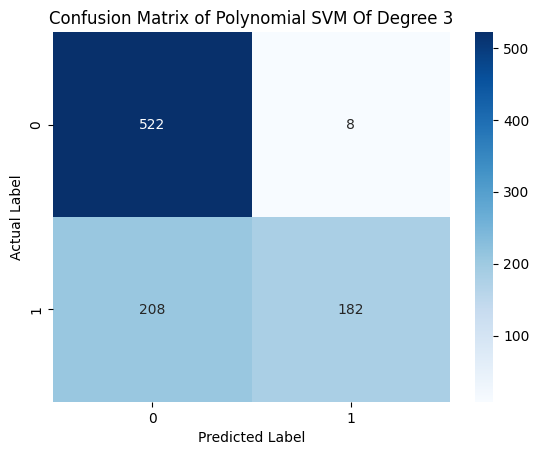

In [15]:
a3 = evm(pd3, X_test, Y_test, "Polynomial SVM Of Degree 3")
results.append(("Polynomial SVM Of Degree 3", a3))

In [16]:
pd2 = SVC(kernel = 'poly', degree = 2)
pd2.fit(X_train, Y_train)

SVC(degree=2, kernel='poly')

Accuracy of Polynomial SVM Of Degree 2 is  0.8272
Classification report of Polynomial SVM Of Degree 2
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       530
           1       0.95      0.63      0.75       390

    accuracy                           0.83       920
   macro avg       0.86      0.80      0.81       920
weighted avg       0.85      0.83      0.82       920



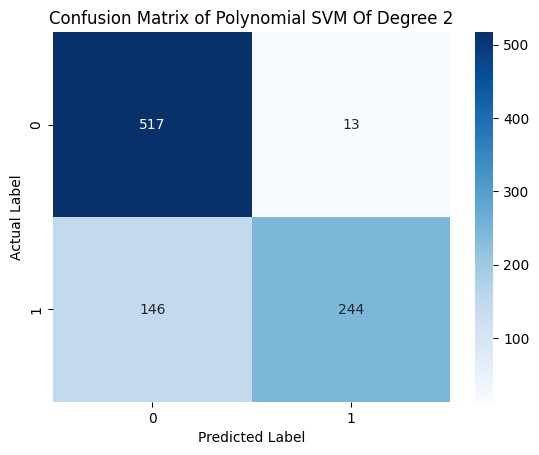

In [17]:
a4 = evm(pd2, X_test, Y_test, "Polynomial SVM Of Degree 2")
results.append(("Polynomial SVM Of Degree 2", a4))

In [18]:
pd4 = SVC(kernel = 'poly', degree = 4)
pd4.fit(X_train, Y_train)

SVC(degree=4, kernel='poly')

Accuracy of Polynomial SVM Of Degree 4 is  0.7130
Classification report of Polynomial SVM Of Degree 4
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       530
           1       0.95      0.34      0.50       390

    accuracy                           0.71       920
   macro avg       0.81      0.66      0.65       920
weighted avg       0.79      0.71      0.67       920



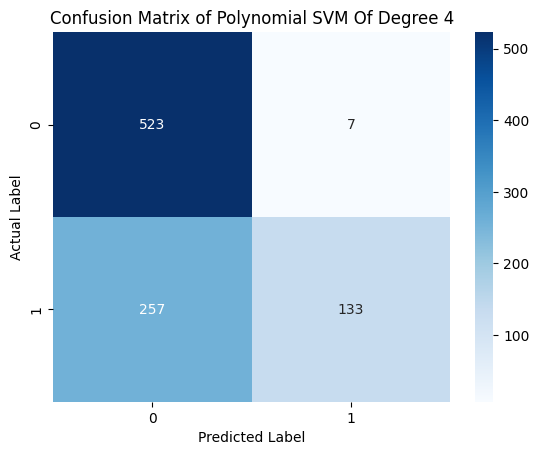

In [19]:
a5 = evm(pd4, X_test, Y_test, "Polynomial SVM Of Degree 4")
results.append(("Polynomial SVM Of Degree 4", a5))

In [20]:
print("Model Evaluation Results : \n")
print(f'{"MODEL" : <30} {"ACCURACY" : <10}')
print('-' * 40)

bm = ""
ba = -99.99

for m, a in results:
    if a >= ba:
        ba = a
        bm = m
    print(f'{m : <30} {a : .4f}')

print(f'The best model is {bm} with accuracy of {ba : .4f}')

Model Evaluation Results : 

MODEL                          ACCURACY  
----------------------------------------
Linear SVM                      0.9217
Radial SVM                      0.9217
Polynomial SVM Of Degree 3      0.7652
Polynomial SVM Of Degree 2      0.8272
Polynomial SVM Of Degree 4      0.7130
The best model is Radial SVM with accuracy of  0.9217


In [21]:
pca = PCA(n_components = 2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

In [22]:
def db(m, X, Y, t):
    h = 0.02
    xmin = X[ : , 0].min() - 1
    xmax = X[ : , 0].max() + 1
    ymin = X[ : , 1].min() - 1
    ymax = X[ : , 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(xmin, xmax, h), 
                        np.arange(ymin, ymax, h))
    
    Z = m.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[ : , 0], X[ : , 1], cmap = plt.cm.coolwarm, c = Y, edgecolors = 'k')
    plt.title(f'Decision Boundary of {t}')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

In [23]:
ls1 = SVC(kernel = 'linear')
ls1.fit(X_train_2d, Y_train)

SVC(kernel='linear')

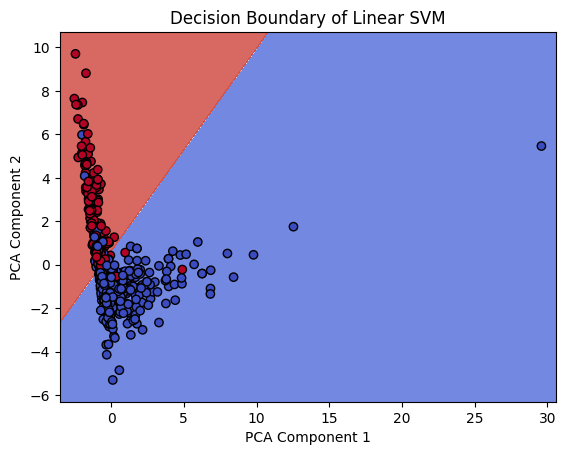

In [24]:
db(ls1, X_test_2d, Y_test, 'Linear SVM')

In [25]:
rs1 = SVC(kernel = 'rbf')
rs1.fit(X_train_2d, Y_train)

SVC()

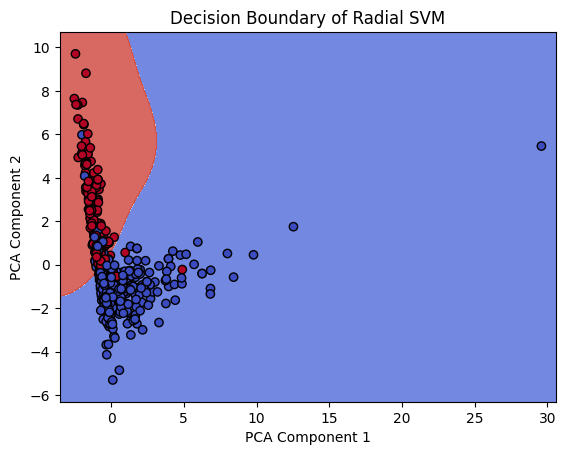

In [26]:
db(rs1, X_test_2d, Y_test, "Radial SVM")

In [27]:
pd31 = SVC(kernel = "poly", degree = 3)
pd31.fit(X_train_2d, Y_train)

SVC(kernel='poly')

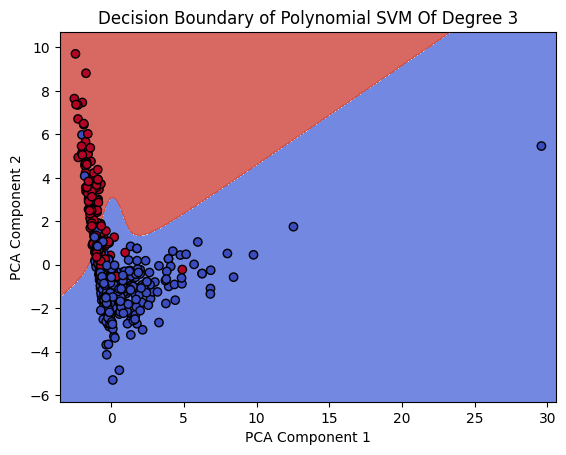

In [28]:
db(pd31, X_test_2d, Y_test, "Polynomial SVM Of Degree 3")